In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# !curl https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv

**1. Load the Global Land Temperature dataset as a list of lists. Before starting, take a moment to bet-
ter inspect the attributes you are going to work on. How many of them are nominal, how many
continuous or discrete?**


| **Type**       | **Count** | **Features** |
|---------------|----------|-------------|
| **Nominal**   | 2        | City, Country |
| **Continuous** | 5        | Date, AverageTemperature, AverageTemperatureUncertainty, Latitude, Longitude |
| **Discrete**  | 0        | None |

In [3]:
df = pd.read_csv('GLT_filtered.csv')
df

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
219570,2012-08-01,23.885,0.435,Xian,China,34.56N,108.97E
219571,2012-09-01,17.028,1.405,Xian,China,34.56N,108.97E
219572,2012-10-01,12.399,0.526,Xian,China,34.56N,108.97E
219573,2012-11-01,4.736,0.519,Xian,China,34.56N,108.97E


**2. Analyze the attribute AverageTemperature, which contains missing values. Fill any gap with the
arithmetic mean among the closest antecedent and the closest successive measurements in time,
taken in the same city.**

In [4]:
df.sort_values(by=['City', 'Date'], inplace=True)

In [5]:
df['AverageTemperature'] = df.groupby('City', group_keys=False)['AverageTemperature'].apply(lambda x: x.interpolate(method='linear'))
df

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,26.787,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
219570,2012-08-01,23.885,0.435,Xian,China,34.56N,108.97E
219571,2012-09-01,17.028,1.405,Xian,China,34.56N,108.97E
219572,2012-10-01,12.399,0.526,Xian,China,34.56N,108.97E
219573,2012-11-01,4.736,0.519,Xian,China,34.56N,108.97E


**3.Task: Define a function that, given the name of a city and an integer 𝑁 > 0 prints:**
1. The top 𝑁 hottest measurements
2. The top 𝑁 coldest measurements

In [26]:
# Function to find top N hottest and coldest temperatures for a given city
def top_n_temperatures(city: str, N: int):
    if df is None:
        print("Dataset not loaded. Please provide a valid dataset.")
        return
    
    # Filter data for the given city
    city_data = df[df["City"].str.lower() == city.lower()]

    if city_data.empty:
        print(f"No data found for city: {city}")
        return

    # Sort temperatures (ascending for coldest, descending for hottest)
    city_data_sorted = city_data.sort_values(by="AverageTemperature", ascending=True)

    # Get top N coldest and hottest
    coldest = city_data_sorted.head(N)
    hottest = city_data_sorted.tail(N)

    print(f"Top {N} Coldest Temps for {city}:")
    print(coldest[['Date', 'AverageTemperature','Country']],end='\n\n\n')
    
    print(f"Top {N} Hottest Temps for {city}:")
    print(hottest[['Date', 'AverageTemperature','Country']].sort_values(by="AverageTemperature", ascending=False))



top_n_temperatures('Xian',10)

Top 10 Coldest Temps for Xian:
              Date  AverageTemperature Country
218579  1930-01-01              -6.418   China
218063  1887-01-01              -5.566   China
217763  1862-01-01              -5.484   China
218878  1954-12-01              -5.421   China
218879  1955-01-01              -5.388   China
218219  1900-01-01              -5.322   China
219143  1977-01-01              -5.303   China
217955  1878-01-01              -4.926   China
219551  2011-01-01              -4.811   China
217751  1861-01-01              -4.766   China


Top 10 Hottest Temps for Xian:
              Date  AverageTemperature Country
218585  1930-07-01              26.762   China
218933  1959-07-01              26.741   China
218729  1942-07-01              26.663   China
218609  1932-07-01              26.544   China
218633  1934-07-01              26.411   China
219077  1971-07-01              26.292   China
219437  2001-07-01              26.094   China
218549  1927-07-01              26.004   Ch

**4. Let’s search for other anomalies in data distribution with the help of matplotlib. Plot the distri-
bution of the average land temperatures for Rome and Bangkok using the aforementioned histogram
plotting function.**

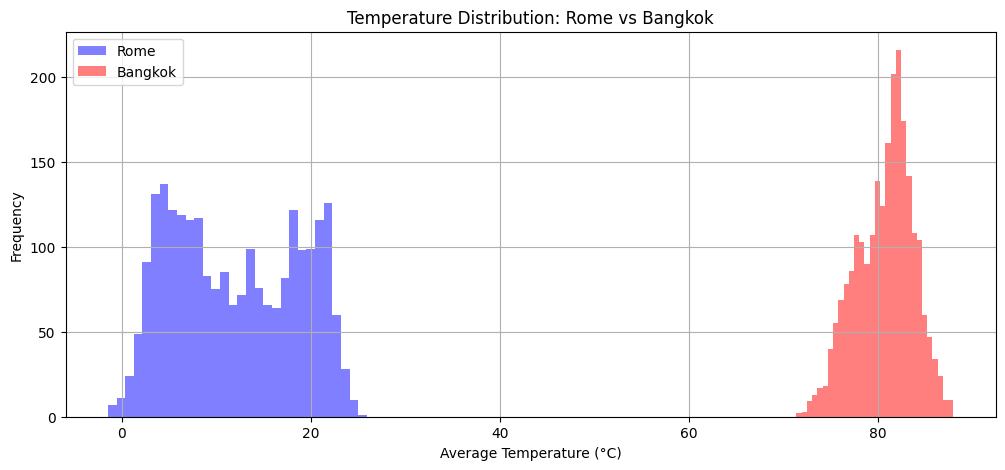

In [29]:
df.columns = df.columns.str.lower()

# Ensure temperature column exists
if "averagetemperature" in df.columns and "city" in df.columns:
    # Filter data for Rome and Bangkok
    rome_data = df[df["city"].str.lower() == "rome"]["averagetemperature"].dropna()
    bangkok_data = df[df["city"].str.lower() == "bangkok"]["averagetemperature"].dropna()

    # Plot histograms
    plt.figure(figsize=(12, 5))

    plt.hist(rome_data, bins=30, alpha=0.5, label="Rome", color="blue")
    plt.hist(bangkok_data, bins=30, alpha=0.5, label="Bangkok", color="red")

    plt.xlabel("Average Temperature (°C)")
    plt.ylabel("Frequency")
    plt.title("Temperature Distribution: Rome vs Bangkok")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Required columns not found in the dataset.")

**5. One might think that Bangkok sensor provide temperature samples in degrees Fahrenheit while
the ones located in Rome use the Celsius notation, which is the common representation in the whole
dataset. Write a function to transform Fahrenheit measurements back to Celsius, apply it to your
data and plot the two distribution again.**

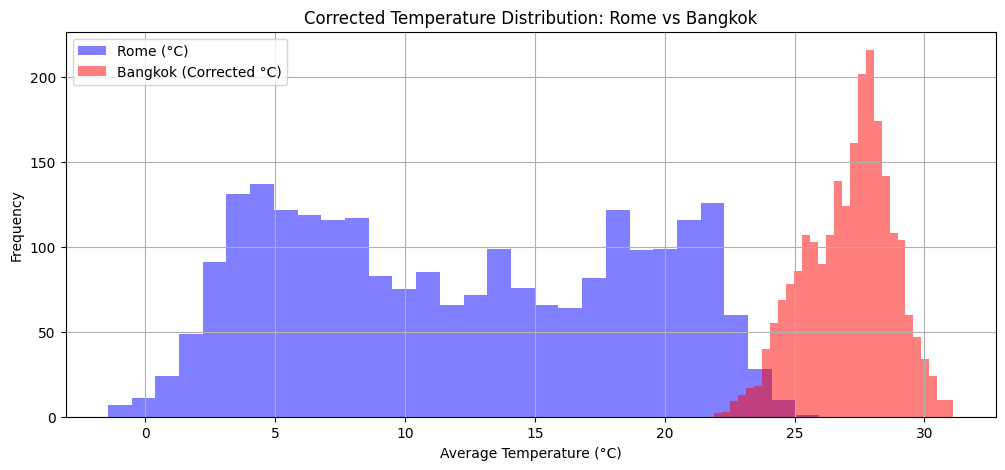

In [30]:
# Function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9


# Convert Bangkok's temperature from Fahrenheit to Celsius
bangkok_data_corrected = bangkok_data.apply(fahrenheit_to_celsius)

# Plot corrected histograms
plt.figure(figsize=(12, 5))

plt.hist(rome_data, bins=30, alpha=0.5, label="Rome (°C)", color="blue")
plt.hist(bangkok_data_corrected, bins=30, alpha=0.5, label="Bangkok (Corrected °C)", color="red")

plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Corrected Temperature Distribution: Rome vs Bangkok")
plt.legend()
plt.grid(True)
plt.show()
